In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# SQLite

### SQLite provides a quick way to setup a database engin without requiring a server. 
#### SQLite is eseentially a flat file, but with major capacities of an SQL database.
### SQLite Advantages
- It's local
    - Create databases locally on your computer to support testing and easy prototyping
- There is an app fro that
    - Can be used on a mobile phone app.
### SQLite Disadvantages
- It's local
    - There is no users for SQLite.
    - SQL is local: stored on one computer or phone, on only that computer or phone will have access.
- There are fewer security features
    - SQLite doesn't have as many security features as a traditional SQL database.

# SQLAlchemy

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# SQLAlchemy Create Engine

### Function create_engine( )
- The primary purpose is to setup the ability to query a database
- This function doesn't actually connect to database
- It just prepares the database file to be connected to later on.
- This function will typically have one parameter, which is the location of the database

### The location of the sqlite database file
- "sqlite:///hawaii.sqlite"

In [7]:
engine  = create_engine("sqlite:///hawaii.sqlite")

# SQLAlchemy Automap Base
### Function automap_base( )
- This function is to reflect a database into a new model.
- To transfer the contents of the database into a different structure of data
- Automap Base creates a base class for an automap schema in SQLAlchemy.
    - Basically it sets up a fundation for us to build on in SQLAlchemy.
    - It will help the rest of our code to function properly.

## Reflect tables - Code decouple
- When we reflect tables, we create classes that help keep our code seperate.
- This ensures that our code is seperated such that if other classes or systems want to interact with it, they can interact with only specific subsets of data instead of the whole dataset.

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# SQLAlchemy Reflect Tables
### Function prepare( )
- With prepare() function we can reflect our tables.
- This function will reflect the schema of the databse (The SQLite tables) into our code and create mappings.

In [9]:
# reflect the tables
Base.prepare(engine, reflect=True)

## View Classed Found by Automap
- Once we have added the base.prepare() function, we should confirm that the Automap was able to find all of the data in the SQLite database. 
- We double check this by using **Base.classes.keys()**. This code references the classes that were mapped in each table.
    - Base.classes: Give us access to all the classes
    - keys(): references all the names of the classes

### classes
- These classes help our data seperated, or decoupled.
- Our data is no longer stored in tables, but rather in classes.
- The code below enables us to essentially copy, or reflect, our data into different classes instead of database tables

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

### In order to reference a specific class, we use Base.classes.class_name

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

## Create Session Link to the Database
- First, we'll use an SQLAlchemy Session to query our database.

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Datetime

In [13]:
import datetime as dt

In [15]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [18]:
results = session.query(Measurement.date, Measurement.prcp)

In [23]:
results

### all( ) transfer results into a list
#### all( ) function extracts all of the results from our query and put them in a list.

In [21]:
results.all()[:5]

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None)]

### filter( ) function
#### filter out all of the data that is older than a year from the last record date.

In [26]:
results = session.query(
    Measurement.date,
    Measurement.prcp
)\
.filter(Measurement.date >= prev_year)\
.all()

#### Save query results as a DatafFaem
- Provide our results variable as one parameter
- Specifiy the column names as our second parameter

In [27]:
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


#### set_index( )
- We can use the variable **inplace** to specify whether or not we want to create a new DataFrame.
- By seeting **inplace=True** we are saying that we do not want to create a new DataFrame with the modified specifications. 
- If we set it to "False", then we would create a new DataFrame. 

In [30]:
df.set_index(df['date'], inplace=True)
df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


In [32]:
print(df.head())

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00


In [35]:
print(df.head().to_string())

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00


#### Not print index out

In [36]:
print(df.head().to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00


In [43]:
df.sample(int(len(df)*0.05)).sample(10)

,date,precipitation
date,,
2016-11-06,2016-11-06,0.02
2017-03-29,2017-03-29,0.00
2016-11-26,2016-11-26,0.02
2017-02-07,2017-02-07,1.79
2016-09-13,2016-09-13,0.37
2016-10-17,2016-10-17,NaN
2017-01-28,2017-01-28,0.00
2016-11-15,2016-11-15,0.00
2016-09-13,2016-09-13,NaN


In [47]:
df = df.sort_index()
df.head(10)

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.70
2016-08-23,2016-08-23,0.02
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15


### Plot the data

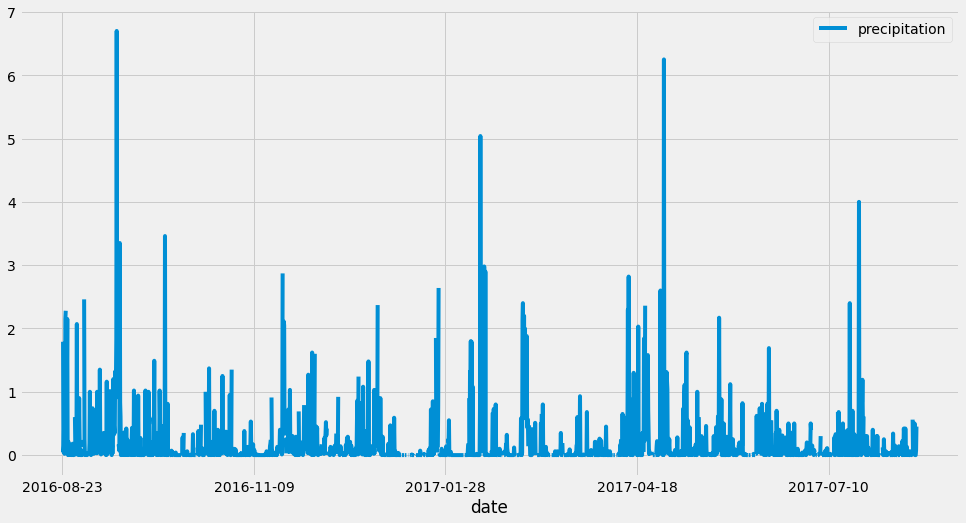

In [49]:
df.plot(figsize=(15, 8))

In [ ]:
df.plot(kind="")

## Keu concepts in statistics
- **Mean**: The average
- **Variance**: How far a set of numbers is from the average.
- **Standard deviation**: A measure of how spread out numbers in a dataset are; The square root of the average.
- **Minimum**
- **Maximum**
- **Percentiles**: Where the number is in relation to the rest of the set of data.
- **Count**

In [50]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### Find the number of station
- all() function to the end of this query so that our results are **returned as a list**

In [51]:
session.query(func.count(Station.station)).all()

[(9)]

In [52]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### For our most active station, we'll need to find the minimum, maximum, and average temperatures.

In [53]:
session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)
).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

#### Create a Query for the Temperature Observations

In [57]:
results = session.query(Measurement.tobs)\
            .filter(Measurement.station == 'USC00519281')\
            .filter(Measurement.date >= prev_year)\
            .all()


In [58]:
df = pd.DataFrame(results, columns=['tobs'])
df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


## histogram
- A histogram is a graph made up of a range of data that is seperated into different bins.
1. figure how many bins you need.

### tight_layout
- Using plt.tight_layout( ), we can comparess the x_axis labels so that they fit into the box hoding our plot.
- it can be a lifesaver in situations where the x-axis doesn't fit into the box

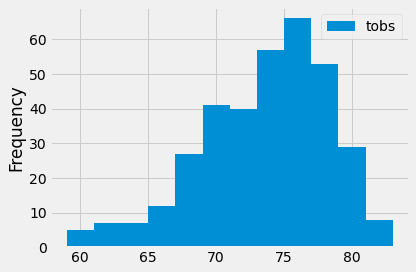

In [63]:
df.plot.hist(bins=12)
plt.tight_layout()

In [62]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge